In [105]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [168]:
df=pd.read_csv('GlobalLandTemperaturesByCountry.csv')
df.dropna(inplace=True)

In [169]:
Indian_data=df[df['Country']=='India']

In [170]:
Indian_data=Indian_data.reset_index()

In [171]:
split_year=lambda x : x[0:4]
split_month=lambda x : x[5:7]

In [172]:
Indian_data['year']=Indian_data['dt'].apply(split_year).astype(int)
Indian_data['month']=Indian_data['dt'].apply(split_month).astype(int)

In [173]:
Indian_data.drop(['index','dt'],axis=1,inplace=True)

In [174]:
train=Indian_data[Indian_data['year'] != 2013]

In [175]:
X=train.iloc[:,3:].values
Y=train.iloc[:,:2].values


In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [177]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [178]:
y_pred=lin_reg.predict(X_test)

In [179]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2.020061632395675
MSE: 9.406044909704981
RMSE: 3.0669276009884845


C:\Users\hipma\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hipma\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


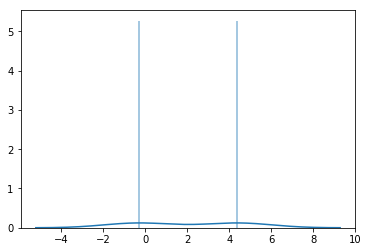